In [8]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

In [9]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
random_faces = dr_datasets.get_faces_random_projection()
boosted_faces = dr_datasets.get_faces_boosted_best_features()

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
reload(common)
n = random_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(random_faces, n)

For n_clusters = 2 average silhouette_score: 0.08809221892087885 time taken: 0.3041234016418457s
For n_clusters = 3 average silhouette_score: 0.0573647508758541 time taken: 0.2505464553833008s
For n_clusters = 4 average silhouette_score: 0.04916801541985677 time taken: 0.5209102630615234s
For n_clusters = 5 average silhouette_score: 0.04380333482708444 time taken: 0.29137086868286133s
For n_clusters = 6 average silhouette_score: 0.038075034314421656 time taken: 0.619652509689331s
For n_clusters = 7 average silhouette_score: 0.03724797092508525 time taken: 0.2933030128479004s
For n_clusters = 8 average silhouette_score: 0.0330563065535858 time taken: 0.2504615783691406s
For n_clusters = 9 average silhouette_score: 0.02964923108427126 time taken: 0.19445514678955078s
For n_clusters = 10 average silhouette_score: 0.02937857027224127 time taken: 0.9331874847412109s
For n_clusters = 11 average silhouette_score: 0.024430187607486453 time taken: 0.30130863189697266s
For n_clusters = 12 averag

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


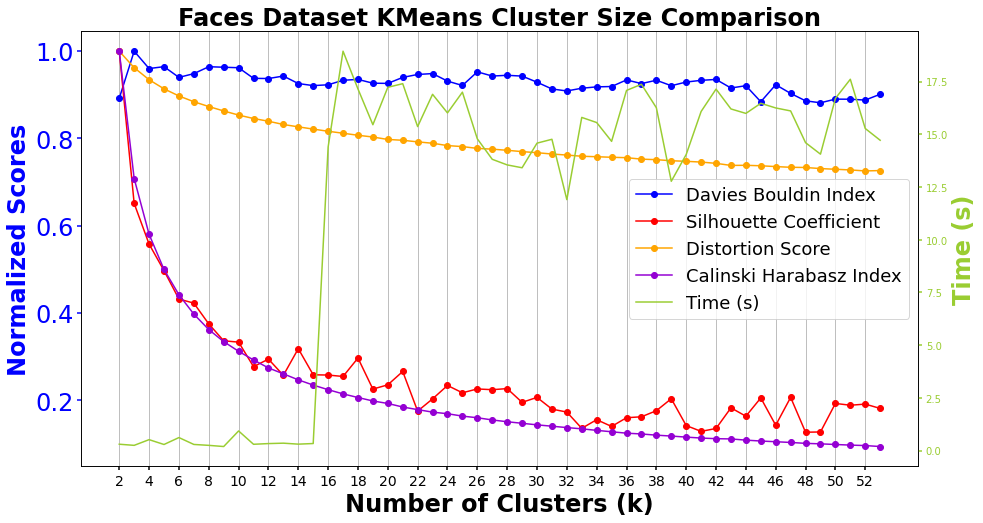

In [11]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


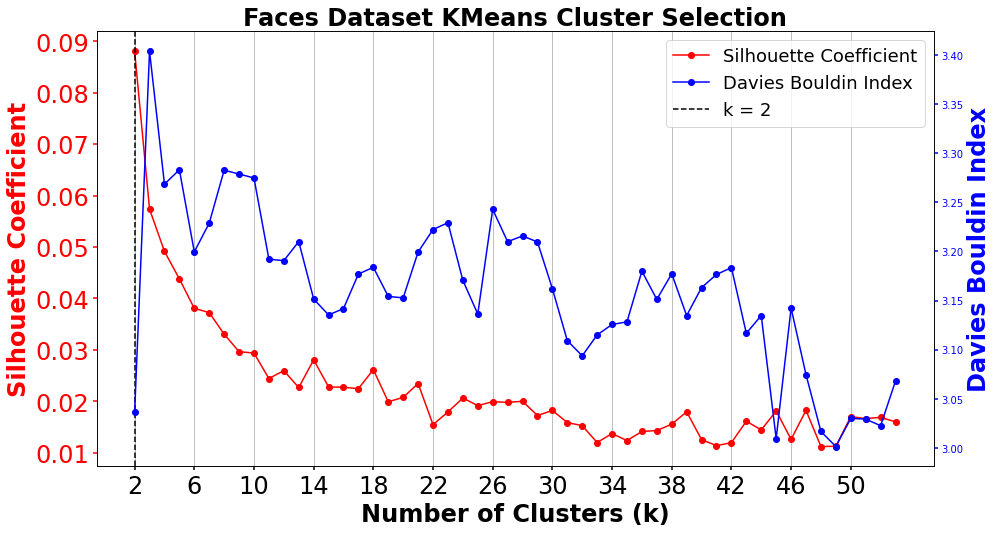

In [35]:
reload(common)
best_k = 2
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 2 average silhouette_score: 0.08809221892087885 time taken: 0.07562708854675293s


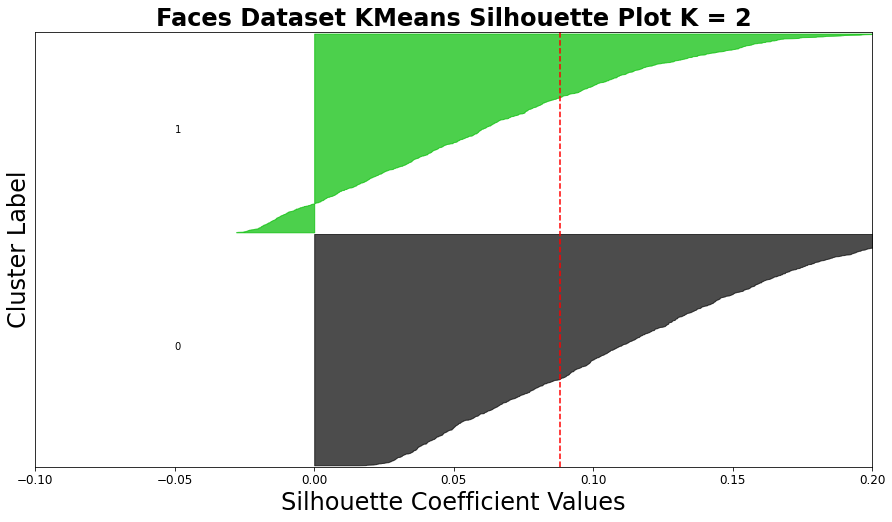

In [36]:
reload(common)
common.plot_silhouette_kmeans(random_faces, best_k, DATASET, xlim=[-0.1, 0.2])

In [37]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(random_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
random_faces_km = pd.DataFrame(random_faces.copy())
random_faces_km['km_labels'] = km.labels_

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))

Time Taken 0.13869333267211914 s
homogeneity_score sex:  9.443238857379526e-05
homogeneity_score race:  0.0007548836272630434


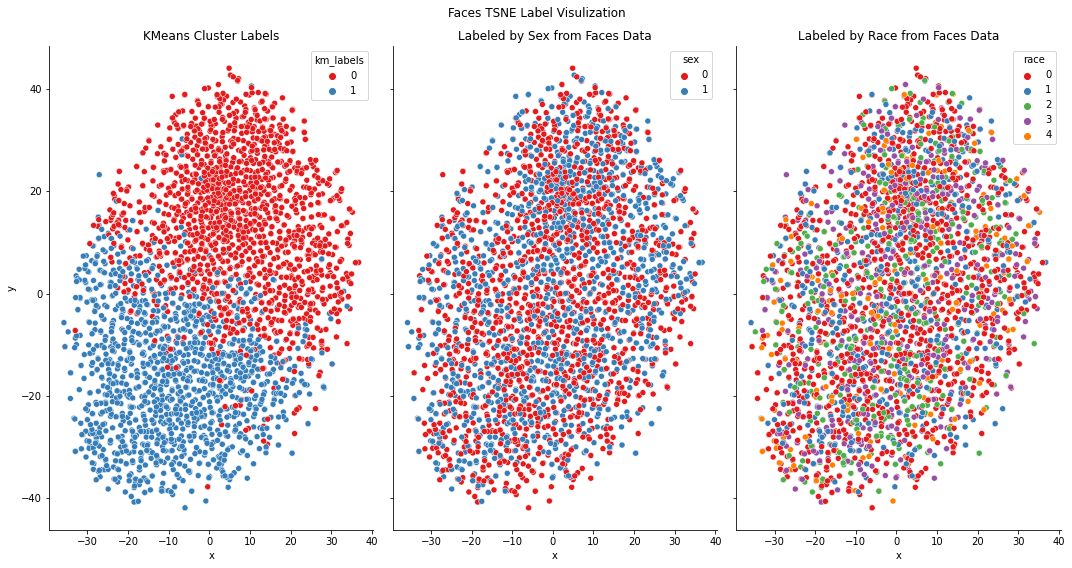

In [38]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(random_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

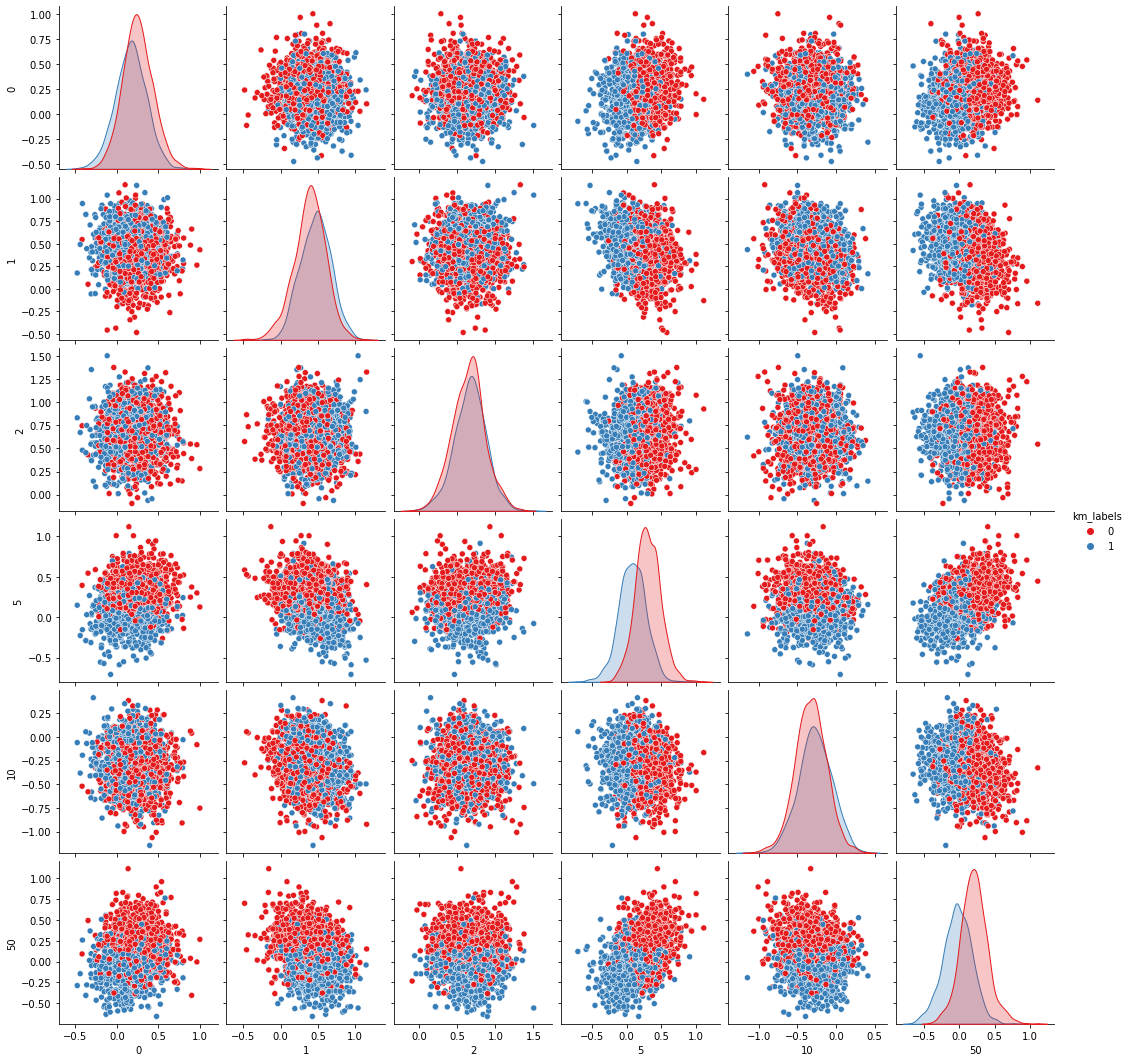

In [39]:
sns.pairplot(random_faces_km[[0, 1, 2, 5, 10, 50, "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [23]:
reload(common)
em_n = random_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(random_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.02512498615908815 time taken: 0.7528011798858643s
For n_clusters = 3 average silhouette_score: 0.004882840580353581 time taken: 1.5541365146636963s


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


For n_clusters = 4 average silhouette_score: -0.004064603959757211 time taken: 3.0979270935058594s


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


For n_clusters = 5 average silhouette_score: 0.016058498180670108 time taken: 3.3968985080718994s
For n_clusters = 6 average silhouette_score: -0.003070541626041174 time taken: 1.5107779502868652s
For n_clusters = 7 average silhouette_score: 0.0029451567876601133 time taken: 2.3480823040008545s
For n_clusters = 8 average silhouette_score: 0.0036657848824219346 time taken: 3.301243782043457s
For n_clusters = 9 average silhouette_score: 0.006281142080622197 time taken: 2.639070510864258s
For n_clusters = 10 average silhouette_score: 0.009344463011526579 time taken: 1.9476985931396484s
For n_clusters = 11 average silhouette_score: 0.01040423829825187 time taken: 2.342087984085083s
For n_clusters = 12 average silhouette_score: 0.011430830296364368 time taken: 2.9586195945739746s
For n_clusters = 13 average silhouette_score: 0.013504013365987234 time taken: 2.909270763397217s
For n_clusters = 14 average silhouette_score: 0.01779049240354195 time taken: 3.440988063812256s
For n_clusters = 15

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


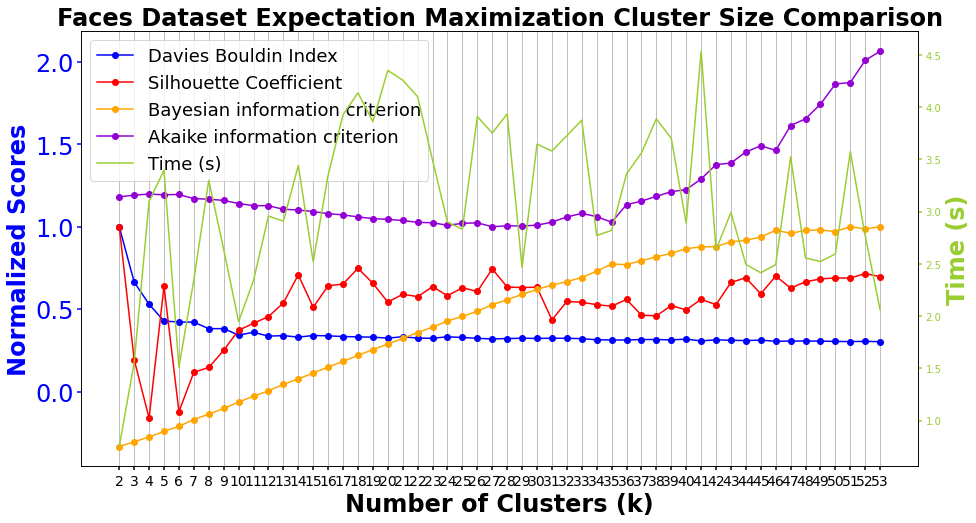

In [24]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


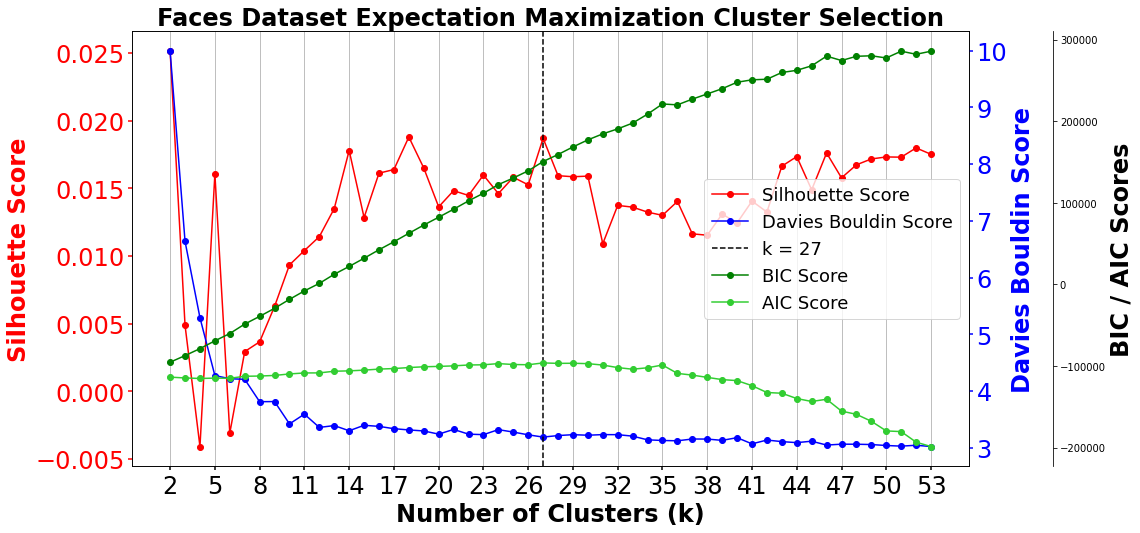

In [34]:
reload(common)
best_k = 27
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=3)

For n_clusters = 27 average silhouette_score: 0.018692353800823215 time taken: 3.893488645553589s


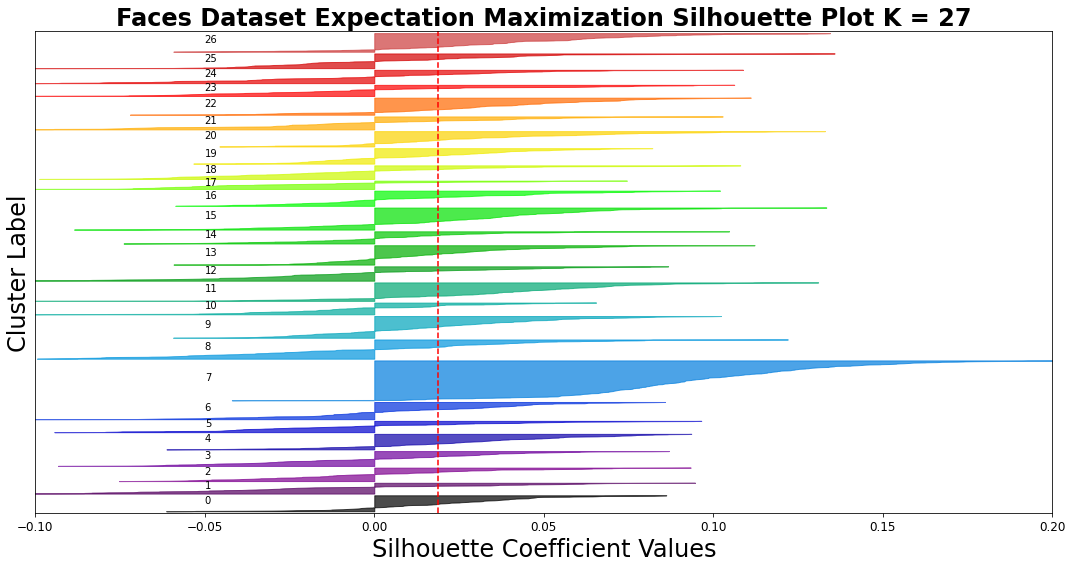

In [27]:
reload(common)
best_k=27
common.plot_silhouette_em(random_faces, best_k, DATASET, xlim=[-0.1, 0.2])

In [29]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(random_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(random_faces)
random_faces_gm = pd.DataFrame(random_faces.copy())
random_faces_gm['em_labels'] = em_model.predict(random_faces)

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(random_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(random_faces), y_train_faces['race']))

time taken 3.209164619445801 s
homogeneity_score sex:  0.003016660247366806
homogeneity_score race:  0.005719890231747982


In [30]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(random_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

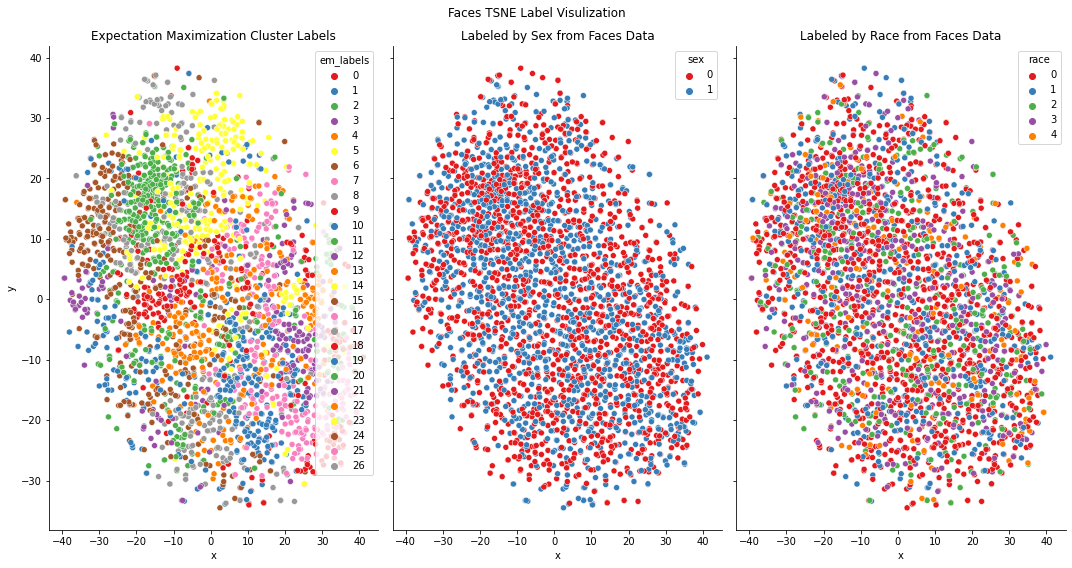

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

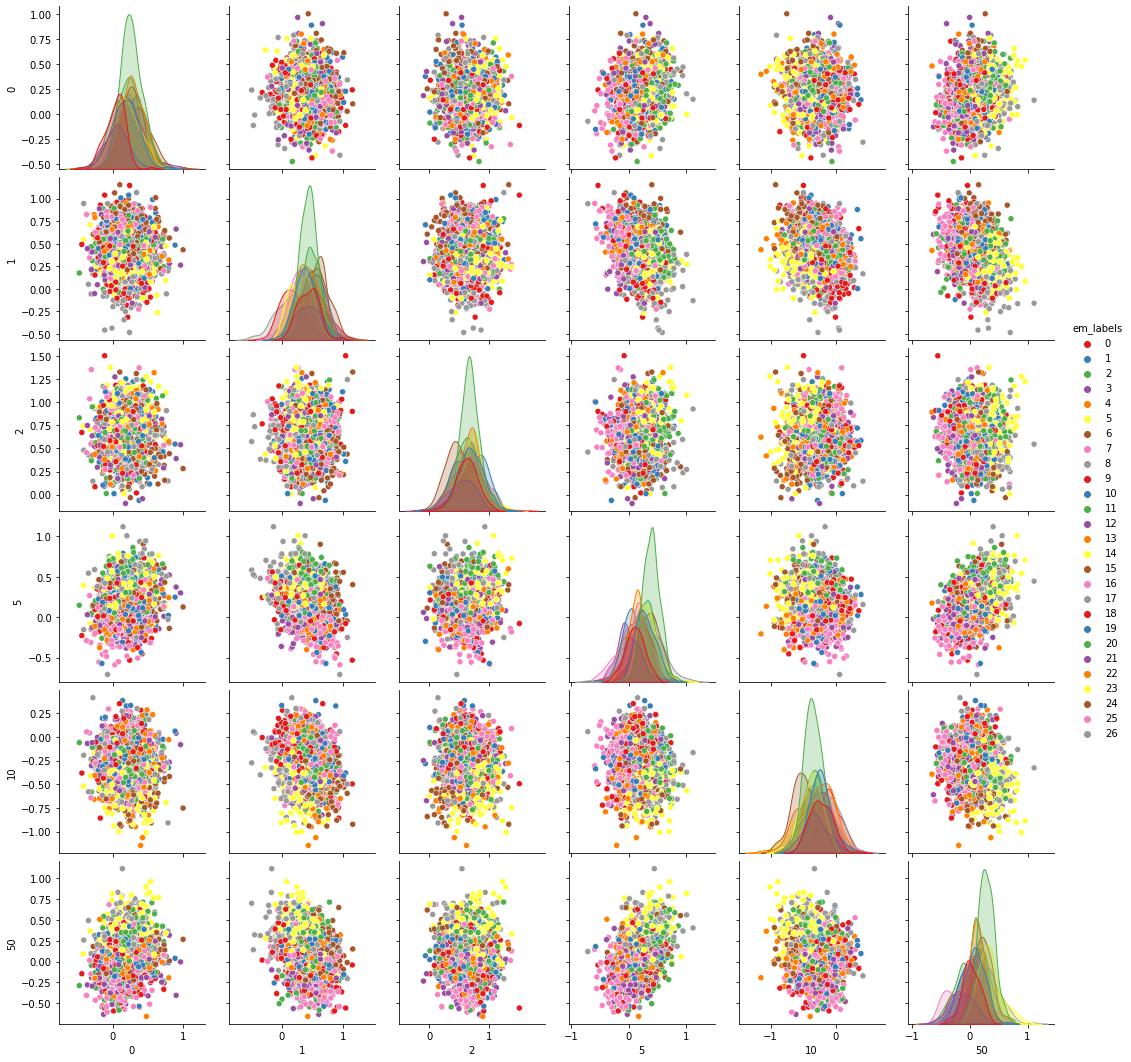

In [32]:
sns.pairplot(random_faces_gm[[0, 1, 2, 5, 10, 50, "em_labels"]], hue="em_labels", palette="Set1")